In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [63]:
ROOT_DIR = "."
FILENAME = "results_v3.tsv"

In [65]:
df = pd.read_csv(os.path.join(ROOT_DIR, FILENAME), sep="\t", header=0)

In [66]:
df.tail()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6022,pp033,M,60,stroke,Slow,NaN,right_shank,FC,440.0,437.0,3.0,15.0,1,1,1,0,0,1
6023,pp033,M,60,stroke,Slow,NaN,right_shank,FC,768.0,766.0,2.0,10.0,1,1,1,0,0,1
6024,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1113.0,1114.0,-1.0,-5.0,1,1,1,0,0,1
6025,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1450.0,1448.0,2.0,10.0,1,1,1,0,0,1
6026,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1804.0,1805.0,-1.0,-5.0,1,1,1,0,0,1


## Gait Parameters

In [67]:
for sub_id in df["sub_id"].unique():
    for task in df["task"].unique():
        for tracked_point in df["tracked_point"].unique():
            df_select = df.loc[(df['sub_id']==sub_id) & (df['task']==task) & (df['tracked_point']==tracked_point)]
df_select

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6015,pp033,M,60,stroke,Slow,NaN,right_shank,IC,219.0,228.0,-9.0,-45.0,1,1,1,0,0,1
6016,pp033,M,60,stroke,Slow,NaN,right_shank,IC,540.0,549.0,-9.0,-45.0,1,1,1,0,0,1
6017,pp033,M,60,stroke,Slow,NaN,right_shank,IC,871.0,878.0,-7.0,-35.0,1,1,1,0,0,1
6018,pp033,M,60,stroke,Slow,NaN,right_shank,IC,1224.0,1228.0,-4.0,-20.0,1,1,1,0,0,1
6019,pp033,M,60,stroke,Slow,NaN,right_shank,IC,1563.0,1566.0,-3.0,-15.0,1,1,1,0,0,1
6020,pp033,M,60,stroke,Slow,NaN,right_shank,IC,1905.0,1910.0,-5.0,-25.0,1,1,1,0,0,1
6021,pp033,M,60,stroke,Slow,NaN,right_shank,FC,116.0,115.0,1.0,5.0,1,1,1,0,0,1
6022,pp033,M,60,stroke,Slow,NaN,right_shank,FC,440.0,437.0,3.0,15.0,1,1,1,0,0,1
6023,pp033,M,60,stroke,Slow,NaN,right_shank,FC,768.0,766.0,2.0,10.0,1,1,1,0,0,1
6024,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1113.0,1114.0,-1.0,-5.0,1,1,1,0,0,1


In [46]:
df_select = df.loc[(df['sub_id']=="pp012") & (df['task']=="Preferred") & (df['tracked_point']=="left_ankle")]
df_select

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
140,pp012,M,76,other,Preferred,NaN,left_ankle,FC,890.0,892.0,-2.0,-10.0,1,1,1,0,0,1
141,pp012,M,76,other,Preferred,NaN,left_ankle,IC,1204.0,1202.0,2.0,10.0,1,1,1,0,0,1
142,pp012,M,76,other,Preferred,NaN,left_ankle,FC,1120.0,1128.0,-8.0,-40.0,1,1,1,0,0,1
143,pp012,M,76,other,Preferred,NaN,left_ankle,IC,NaN,22.0,NaN,NaN,0,1,0,0,1,1
144,pp012,M,76,other,Preferred,NaN,left_ankle,IC,259.0,257.0,2.0,10.0,1,1,1,0,0,1
145,pp012,M,76,other,Preferred,NaN,left_ankle,FC,1351.0,1366.0,-15.0,-75.0,1,1,1,0,0,1
146,pp012,M,76,other,Preferred,NaN,left_ankle,FC,177.0,180.0,-3.0,-15.0,1,1,1,0,0,1
147,pp012,M,76,other,Preferred,NaN,left_ankle,IC,500.0,501.0,-1.0,-5.0,1,1,1,0,0,1
148,pp012,M,76,other,Preferred,NaN,left_ankle,FC,418.0,420.0,-2.0,-10.0,1,1,1,0,0,1
149,pp012,M,76,other,Preferred,NaN,left_ankle,IC,735.0,735.0,0.0,0.0,1,1,1,0,0,1


In [58]:
ix_IC = df_select.loc[df_select["event_type"]=="IC"][["ix_ref", "ix_pred"]].to_numpy()
print(ix_IC)

[[ 219.  228.]
 [ 540.  549.]
 [ 871.  878.]
 [1224. 1228.]
 [1563. 1566.]
 [1905. 1910.]]


In [59]:
ix_IC_ref = np.sort(df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:])
ix_IC_pred = df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:]
ix_FC_ref = df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:]
ix_FC_pred = df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:]
print(ix_IC_ref)
print(ix_IC_pred)
print(ix_FC_ref)
print(ix_FC_pred)

[ 219.  540.  871. 1224. 1563. 1905.]
[ 228.  549.  878. 1228. 1566. 1910.]
[ 116.  440.  768. 1113. 1450. 1804.]
[ 115.  437.  766. 1114. 1448. 1805.]


In [60]:
for i in range(len(ix_IC_ref)-1):
    print(f"Stride time: {(ix_IC_ref[i+1]-ix_IC_ref[i])/200:.2f} {(ix_IC_pred[i+1]-ix_IC_pred[i])/200:.2f}")
    j = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
    k = np.argwhere(ix_FC_pred > ix_IC_pred[i])[:,0][0]
    print(f"Stance time: {(ix_FC_ref[j]-ix_IC_ref[i])/200:.2f} {(ix_FC_pred[k]-ix_IC_pred[i])/200:.2f}")
    print(f"Swing time: {(ix_IC_ref[i+1]-ix_FC_ref[j])/200:.2f} {(ix_IC_pred[i+1]-ix_FC_pred[k])/200:.2f}")

Stride time: 1.60 1.60
Stance time: 1.10 1.04
Swing time: 0.50 0.56
Stride time: 1.66 1.65
Stance time: 1.14 1.08
Swing time: 0.52 0.56
Stride time: 1.76 1.75
Stance time: 1.21 1.18
Swing time: 0.56 0.57
Stride time: 1.70 1.69
Stance time: 1.13 1.10
Swing time: 0.56 0.59
Stride time: 1.71 1.72
Stance time: 1.21 1.20
Swing time: 0.51 0.53


In [17]:
true_initial_contacts = np.asarray(df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:], dtype=int)
detected_initial_contacts = np.asarray(df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:], dtype=int)
true_final_contacts = np.asarray(df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:], dtype=int)
detected_final_contacts = np.asarray(df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:], dtype=int)

In [27]:
for i in range(1, len(true_initial_contacts)):
    print(f"Swing time: {(true_initial_contacts[i]-true_initial_contacts[i-1])/200:.3f} v {(detected_initial_contacts[i]-detected_initial_contacts[i-1])/200:.3f}")


Swing time: 1.605 v 1.595
Swing time: 1.655 v 1.650
Swing time: 1.765 v 1.750
Swing time: 1.695 v 1.695
Swing time: 1.710 v 1.715


## Events
Split events by event type. We don't want to mix up the detection of initial contacts and final contacts.

In [68]:
df_ic = df.loc[df['event_type']=='IC']
df_fc = df.loc[df['event_type']=='FC']

## Overall detection performance

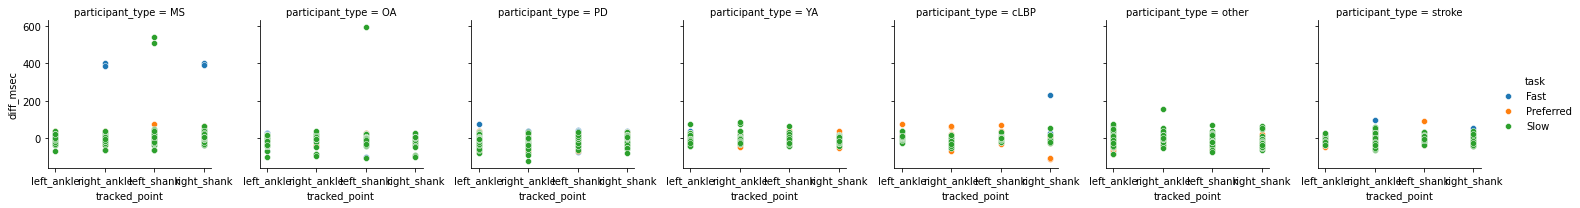

In [70]:
g = sns.FacetGrid(df_ic, col="participant_type", hue="task")
g.map(sns.scatterplot, "tracked_point", "diff_msec")
g.add_legend()
plt.show()

## Time error

In [12]:
fig, ax = plt.sublots()


('MS', 'left_ankle')
('MS', 'left_shank')
('MS', 'right_ankle')
('MS', 'right_shank')
('OA', 'left_ankle')
('OA', 'left_shank')
('OA', 'right_ankle')
('OA', 'right_shank')
('PD', 'left_ankle')
('PD', 'left_shank')
('PD', 'right_ankle')
('PD', 'right_shank')
('YA', 'left_ankle')
('YA', 'left_shank')
('YA', 'right_ankle')
('YA', 'right_shank')
('cLBP', 'left_ankle')
('cLBP', 'left_shank')
('cLBP', 'right_ankle')
('cLBP', 'right_shank')
('other', 'left_ankle')
('other', 'left_shank')
('other', 'right_ankle')
('other', 'right_shank')
('stroke', 'left_ankle')
('stroke', 'left_shank')
('stroke', 'right_ankle')
('stroke', 'right_shank')


In [ ]:
df_ic["diff"].describe()

count    1292.000000
mean       -0.962074
std         6.355779
min      -104.000000
25%        -3.000000
50%        -1.000000
75%         1.000000
max        82.000000
Name: diff, dtype: float64

In [ ]:
(df_ic["diff"].quantile(0.1), df_ic["diff"].quantile(0.9))

(-6.0, 3.0)

In [ ]:
df_ic.loc[df_ic["diff"]<df_ic["diff"].quantile(0.1)]

,sub,gender,participant_type,task,run,side,event_type,ix_ref,ix_pred,diff,tp,fp,fn,checksum
97,pp012,M,other,Slow,NaN,left,IC,711.0,718.0,-7.0,1,0,0,1
102,pp012,M,other,Slow,NaN,left,IC,1814.0,1824.0,-10.0,1,0,0,1
322,pp025,M,stroke,Fast,NaN,right,IC,499.0,508.0,-9.0,1,0,0,1
443,pp029,M,MS,Preferred,NaN,left,IC,292.0,299.0,-7.0,1,0,0,1
455,pp029,M,MS,Preferred,NaN,right,IC,962.0,971.0,-9.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,pp140,M,PD,Slow,on,right,IC,1252.0,1259.0,-7.0,1,0,0,1
2617,pp140,M,PD,Slow,on,right,IC,1556.0,1568.0,-12.0,1,0,0,1
2673,pp149,M,stroke,Slow,NaN,right,IC,1876.0,1909.0,-33.0,1,0,0,1
2738,pp155,F,MS,Fast,NaN,left,IC,34.0,138.0,-104.0,1,0,0,1


/home/robbin/Projects/my-gait-events-tcn/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-25.0, 25.0)

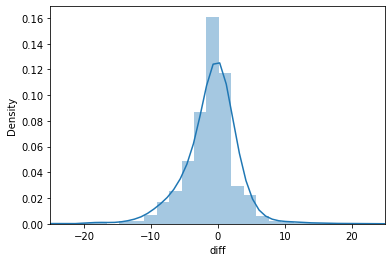

In [ ]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_ic['diff'], bins=100)
ax.set_xlim([-25, 25])